# 多次元配列

## このセクションの目標

- NumPy の次元の概念を理解して，多次元配列の操作を学ぶ。
- 表形式データとベクトル時系列データの表現の変換方法を学ぶ。

配列 (arrays) というのは同じ型のデータを並べたもの。ベクトルや行列を表現するために使う。

Python のリストは一見すると配列のように見えるが，数値計算に適していない。数値計算には **NumPy** が提供する `ndarray` を主に用いる。`ndarray` に対する種々の数値演算が定義されている。

Python のリストに対して `numpy.array()` を適用すると，**NumPy** の配列を作ることができる。**NumPy** は `np` というエイリアスを使うのが慣例になっている。

In [1]:
import numpy as np

Python のリストを **NumPy** の `ndarray` に変換する。

In [2]:
list_1d = [1, 2, 3]
ndarray_1d = np.array(list_1d)
ndarray_1d

array([1, 2, 3])

`ndarray` には `shape` という属性が定義されている。ベクトルや行列のサイズを保存している。タプルの長さ（タプルの中の数字ではなく）が配列の次元になる。

In [3]:
ndarray_1d.shape

(3,)

上のように作られた配列は縦横が定まっていないことに注意しよう。縦ベクトルを作るためには次のようにする。

In [4]:
col_vector = np.array([
    [1],
    [2],
    [3]
])
col_vector

array([[1],
       [2],
       [3]])

In [5]:
col_vector.shape

(3, 1)

`shape` の違いに注意せよ。 `(3,)` は1次元のデータで縦横の概念が定義されていないことを表している。唯一の次元の自由度が 3 である。$\mathbb{R}^3$ の元を表現する際にもっとも標準的なものである。一方，`(3,1)` とあれば2次元のデータで，2つ目の次元の自由度が1であることを表している。しいていえば，$\mathbb{R}^{3 \times 1}$ の元である。行列演算ではベクトルの縦横を決めないといけないので，線形代数学で単に $\mathbb{R}^3$ と書いた場合にも縦ベクトルか行ベクトルかを固定して考えていることが多い。`ndarray` は明示的に縦横を指定しなければ「柔軟」に振る舞う。

### 練習

- $\mathbb{R}^{1 \times 3}$ の元（横ベクトル）を1つ作ってみよう。
- `x.shape==(3,)`, `y.shape==(3, 1)` である配列 `x`, `y` を作り，和を計算してみよう。 
- `x.shape==(3,)`, `y.shape==(1, 3)` である配列 `x`, `y` を作り，和を計算してみよう。
- `x.shape==(3, 1)`, `y.shape==(1, 3)` である配列 `x`, `y` を作り，和を計算してみよう。

**ヒント:**

- `reshape` というメソッドを使うと `shape` の変更ができる。
- 生成済みのオブジェクトの `shape` を変更するには，新しい値を代入すればよい。

In [6]:
np.array([1, 2]).reshape((2, 1))

array([[1],
       [2]])

In [7]:
x = np.array([1, 2, 3])
x.shape = (3, 1)
x

array([[1],
       [2],
       [3]])

### 行列

行列のようなデータを扱いたいときには，リストのリストに `np.array` を適用すればよい。

<div style="color: red;">
  「適用」という言葉は英語の apply の翻訳だと思われるが，適用という日本語は「関数を作用させる」という動作と合致している？
</div>
    

In [8]:
list_2d = [[11, 12, 13],
           [21, 22, 23]]

ndarray_2d = np.array(list_2d)
ndarray_2d

array([[11, 12, 13],
       [21, 22, 23]])

In [9]:
ndarray_2d.shape

(2, 3)

`numpy.matrix` というオブジェクト型が利用可能だが，非推奨になっている。

### より高次の自由度

`shape` をもっと長くすることもできる。ただし，本書で扱うのは `shape` の長さが3，つまり `shape==(T, M, N)` という形式のデータまでである。

In [121]:
x = np.arange(16)
x.reshape((4, 4))

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [11]:
x.reshape((2, 2, 4))

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [12]:
x.reshape((2, 2, 2, 2))

array([[[[ 0,  1],
         [ 2,  3]],

        [[ 4,  5],
         [ 6,  7]]],


       [[[ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15]]]])

## ベクトル時系列の表現

\begin{align}
x_0 = \begin{bmatrix} a_{00}\\ a_{01}\end{bmatrix}, \quad
x_1 = \begin{bmatrix} a_{10}\\ a_{11}\end{bmatrix}, \quad
x_2 = \begin{bmatrix} a_{20}\\ a_{21}\end{bmatrix}, \dots
\end{align}

のようなベクトル時系列を表現する1つの方法は，表形式に並べることである。

\begin{align}
\begin{bmatrix}
  a_{00} & a_{01}\\
  a_{10} & a_{11}\\
  a_{20} & a_{21}\\
  \vdots & \vdots
\end{bmatrix}
\end{align}

In [13]:
X = np.array([
    [100, 101],
    [110, 111],
    [120, 121]
])
X

array([[100, 101],
       [110, 111],
       [120, 121]])

In [14]:
X.shape

(3, 2)

多くの場合，このような形式でうまくいくだろう。例えば $x_2$ を取得するためには次のようにすればよい。

行列が「リストのリスト」であると考えれば，2行目は次のように取得できる。

In [15]:
X[2]

array([120, 121])

**NumPy** 専用の記法を使えば次のようになる。

In [16]:
X[2, :]

array([120, 121])

どちらを使っても `shape` は `(2,)` となる。これは，縦・横の情報がない2次元ベクトルと思えばよいだろう。 $N \times 2$ 行列を左から掛けることもできし，

In [17]:
A = np.ones((5, 2))
A

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [18]:
A @ X[2]

array([241., 241., 241., 241., 241.])

$2 \times N$ 行列を右から掛けることもできる。

In [19]:
B = np.ones((2, 5))
B

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [20]:
X[2] @ B

array([241., 241., 241., 241., 241.])

この振る舞いは望ましい場合もあるかもしれないが，思わぬミスを招く可能性がある。行列からベクトルを取り出しているつもりで操作して，縦横の情報が失われてしまうことを忘れてしまうと誤った計算をしてしまうことがある。

この問題を避けるために，表形式を用いた表現ではなく，1つ次元の大きい3次元配列を用いた表現を用いるとよい。つまり， $2\times 1$ ベクトルが並んでいると考える。


In [21]:
Y = np.array([
    [[100], [101]],
    [[110], [111]],
    [[120], [121]]
])
Y

array([[[100],
        [101]],

       [[110],
        [111]],

       [[120],
        [121]]])

In [22]:
A @ Y[2]

array([[241.],
       [241.],
       [241.],
       [241.],
       [241.]])

今度は縦横が厳格に設定されている。次のコードは積が定義されておらずエラーになる。「間違ったコードでエラーになりやすい」というのは，安全性の観点からは望ましい性質である。

In [23]:
Y[2] @ B

ValueError: shapes (2,1) and (2,5) not aligned: 1 (dim 1) != 2 (dim 0)

In [24]:
Y.shape

(3, 2, 1)

## 縦横の次元を指定しよう

ベクトル時系列を表現するのに，2次元配列（行列）を用いるか3次元配列を用いるかは，好みの問題ともいえる。複雑な問題でなければ，表形式（2次元）のデータ形式でよい。しかし，計算が複雑になったりする場合には，3次元配列を使う方がコードを簡潔に保てる可能性がある。本書では単純なコードでない限りは，3次元配列を用いたデータ構造を使用することをおすすめする。

縦横の定まっていないベクトルと縦横の定まっているベクトルが両方現れると厄介な問題が起こることをもう一度確認しておこう。

In [25]:
a = np.array([1, 2])
a

array([1, 2])

In [26]:
b = np.array([[-1], [-2]])
b

array([[-1],
       [-2]])

In [27]:
a + b

array([[ 0,  1],
       [-1,  0]])

これは

`a[0] + b, a[1] + b`

を計算して横に並べたものである。

常にこのような問題に気を配るのは大変なので，はじめから縦横をきちんと定めておくほうがよい，というのが本書の提案だ。つまり，ベクトル時系列データを保存する変数は常に `shape` が次の形式になるようにする。

`(シミュレーション時間, 変数の数, 1)`


pandas などのライブラリで分析を進めたいときには，`squeeze` または `reshape` を使って表形式に変換すればよい。

In [28]:
Y

array([[[100],
        [101]],

       [[110],
        [111]],

       [[120],
        [121]]])

In [136]:
Y.squeeze(axis=2)

array([[100, 101],
       [110, 111],
       [120, 121]])

In [137]:
import pandas as pd

df = pd.DataFrame(Y.squeeze(axis = 2), columns=['GDP', 'DF'])
df

,GDP,DF
0,100,101
1,110,111
2,120,121


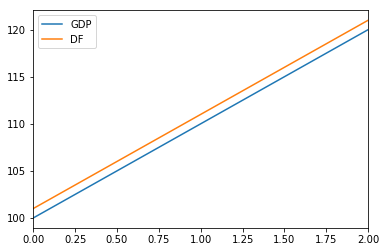

In [145]:
import matplotlib.pyplot as plt

df.plot.line()
plt.show()

## 1次元の数列もベクトル列とみなす

$n$ 変数のベクトル時系列を $T$ 期間に渡って観測したデータは `shape` が `(T, n, 1)` の Numpy配列に格納しようということを説明した。$n=1$ の場合は `(T,)` でもよいような気がするのだが, この場合にも `(T,1,1)` のデータ構造を使う方が苦労が少ない。一見すると無意味に複雑になっているように見えるが，それなりにご利益がある。

In [30]:
u_1d = np.ones(10)

In [31]:
u_1d

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [32]:
u_3d = np.ones((10, 1, 1))
u_3d

array([[[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]]])

例えば, 行列 $C$ を時点 2 における `u` に掛けたいとしよう。

In [33]:
C = np.array([[2], [3]])
C

array([[2],
       [3]])

In [34]:
C @ u_1d[2]

ValueError: Scalar operands are not allowed, use '*' instead

In [35]:
C @ u_3d[2]

array([[2.],
       [3.]])

ご覧のように `u_3d` では動くコードが `u_1d` に対しては動かないということが起こる。行列積 `@` がスカラーの積に対応していためにこのような問題が起こっている。もちろん， `u` が必ず1変数の数列になるのであれば `*` を使えばよいが，1変数でも多変数でも動くような汎用性を求める場合には多次元配列を使ってコードを書くほうがより自然なコードになる。（`numpy.array.dot` というメソッドを使えば `@` と違ってエラーを出さない。しかし，コードの見栄えが煩雑になる）

`u_3d` と `u_1d` は `squeeze` と `reshape` で行き来できる。(`reshape` の代わりに `numpy.expand_dims()` を2回使うこともできる)

In [36]:
u_3d.squeeze()

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [37]:
u_1d.reshape((len(u_1d), 1, 1))

array([[[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]]])

In [38]:
np.expand_dims(np.expand_dims(u_1d, 1), 1)

array([[[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]]])

In [122]:
u_1d

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [124]:
C = np.array([[1], [2]])
C

array([[1],
       [2]])

In [125]:
C @ u_1d[5]

ValueError: Scalar operands are not allowed, use '*' instead

In [126]:
u_1d[5]

1.0

In [128]:
C * 1

array([[1],
       [2]])

In [132]:
np.array([[3], [-4]]) + C @ u_3d[5]

array([[ 4.],
       [-2.]])

In [133]:
u_3d[5]

array([[1.]])

In [134]:
C @ u_3d[5]

array([[1.],
       [2.]])